# Flipr Hackathon 5.0 Machine learning

# Stock Market Price Prediction

## Problem Statement 1: Prediction of Stock Price

## Model Development

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Reframing the Dataset

In [2]:
df = pd.read_excel('cleaned_final_train_data.xlsx')
df.head()

,Unnamed: 0,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,...,Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate
0,0,AA1,NYSE,Real Estate,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,...,0.845528,0.013351,0.472868,0.962343,156.987852,0,0,0,0,1
1,1,AA4,BSE,Materials,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,...,0.700813,1.000000,0.860465,0.585774,1121.787632,0,0,0,1,0
2,2,AA6,BSE,Materials,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,...,0.559350,1.000000,0.891473,0.576360,158.687016,0,0,0,1,0
3,3,AA7,NYSE,Healthcare,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,...,0.302439,0.013351,0.581395,0.899582,209.645870,0,1,0,0,0
4,4,AA9,NSE,Materials,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,...,0.868293,1.000000,0.945736,0.675732,514.240811,0,0,0,1,0


In [3]:
df.drop(['Unnamed: 0','Industry'],axis = 1, inplace = True)

## One hot encoding the Index parameter

In [4]:
dummy_variable_1 = pd.get_dummies(df["Index"])
dummy_variable_1.head(10)

,BSE,JSE,NSE,NYSE,S&P 500
0,0,0,0,1,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,0,0,1
9,0,0,0,1,0


In [5]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.head(10)

,Stock Index,Index,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
0,AA1,NYSE,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,...,0,0,0,0,1,0,0,0,1,0
1,AA4,BSE,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,...,0,0,0,1,0,1,0,0,0,0
2,AA6,BSE,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,...,0,0,0,1,0,1,0,0,0,0
3,AA7,NYSE,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,...,0,1,0,0,0,0,0,0,1,0
4,AA9,NSE,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,...,0,0,0,1,0,0,0,1,0,0
5,AA21,S&P 500,0.951472,0.060143,0.230346,0.567235,0.153556,0.387755,0.294872,0.723577,...,0,0,1,0,0,0,0,0,0,1
6,AA22,BSE,0.323608,0.685225,0.312963,0.872931,0.847639,0.496999,1.000000,0.367480,...,0,1,0,0,0,1,0,0,0,0
7,AA23,JSE,0.415609,1.000000,0.432787,0.536630,0.441875,0.791116,1.000000,0.482927,...,0,1,0,0,0,0,1,0,0,0
8,AA24,S&P 500,0.434527,0.060143,0.499800,0.193529,0.804406,0.424970,-0.551282,0.747967,...,0,0,0,0,1,0,0,0,0,1
9,AA25,NYSE,0.536961,0.229099,0.682136,0.875131,0.106015,0.470588,-0.551282,0.956098,...,0,0,0,0,1,0,0,0,1,0


In [6]:
df.drop(['Stock Index','Index'], axis = 1, inplace = True)

In [7]:
df.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
0,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,0.013351,0.472868,...,0,0,0,0,1,0,0,0,1,0
1,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,1.000000,0.860465,...,0,0,0,1,0,1,0,0,0,0
2,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,1.000000,0.891473,...,0,0,0,1,0,1,0,0,0,0
3,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,0.013351,0.581395,...,0,1,0,0,0,0,0,0,1,0
4,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,1.000000,0.945736,...,0,0,0,1,0,0,0,1,0,0


In [8]:
y_data = df['Stock Price']
y_data.head()

0     156.987852
1    1121.787632
2     158.687016
3     209.645870
4     514.240811
Name: Stock Price, dtype: float64

In [9]:
x_data = df.drop(['Stock Price'], axis =1)
x_data.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
0,0.725531,0.229099,0.323865,0.226784,0.059967,0.606242,-0.551282,0.845528,0.013351,0.472868,...,0,0,0,0,1,0,0,0,1,0
1,0.857979,0.685225,0.736747,0.758914,0.412653,0.576230,0.038462,0.700813,1.000000,0.860465,...,0,0,0,1,0,1,0,0,0,0
2,0.268967,0.685225,0.106321,0.765365,0.955812,0.965186,0.038462,0.559350,1.000000,0.891473,...,0,0,0,1,0,1,0,0,0,0
3,0.658271,0.229099,0.672234,0.148172,0.351590,0.704682,1.000000,0.302439,0.013351,0.581395,...,0,1,0,0,0,0,0,0,1,0
4,0.985081,0.202257,0.315063,0.798020,0.067529,0.326531,0.038462,0.868293,1.000000,0.945736,...,0,0,0,1,0,0,0,1,0,0


## Train Val split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=3)

In [11]:
x_train.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
2157,0.315817,1.000000,0.816163,0.807271,0.046615,0.807923,0.038462,0.547967,0.236315,0.604651,...,0,0,0,1,0,0,1,0,0,0
763,0.932243,0.202257,0.760152,0.223033,0.837263,0.938776,0.141026,0.970732,1.000000,0.775194,...,1,0,0,0,0,0,0,1,0,0
6353,0.859492,0.685225,0.176235,0.316347,0.816963,0.397359,0.294872,0.282927,1.000000,0.682171,...,0,0,1,0,0,1,0,0,0,0
4854,0.443572,0.685225,0.822164,0.171476,0.668890,0.643457,-0.551282,0.863415,1.000000,0.635659,...,0,0,0,0,1,1,0,0,0,0
1506,0.655546,0.202257,0.265953,0.520828,0.661653,0.683073,0.038462,0.500813,1.000000,0.666667,...,0,0,0,1,0,0,0,1,0,0


In [12]:
x_test.head()

,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,...,Industry-Energy,Industry-Healthcare,Industry-Information Tech,Industry-Materials,Industry-Real Estate,BSE,JSE,NSE,NYSE,S&P 500
3724,0.148734,0.685225,0.674335,0.113367,0.785810,0.750300,-0.551282,0.642276,1.000000,0.720930,...,0,0,0,0,1,1,0,0,0,0
5629,0.239523,1.000000,0.422985,0.603341,0.604138,0.361345,0.038462,0.749593,0.236315,0.496124,...,0,0,0,1,0,0,1,0,0,0
125,0.617223,1.000000,0.371674,0.971446,0.473983,0.321729,-0.551282,0.926829,0.236315,0.945736,...,0,0,0,0,1,0,1,0,0,0
2554,0.080594,0.685225,0.241048,0.845577,0.395339,0.893157,1.000000,0.294309,1.000000,0.937984,...,0,1,0,0,0,1,0,0,0,0
425,0.152184,0.060143,0.899580,0.631295,0.831533,0.521008,-0.551282,0.349593,0.013351,0.767442,...,0,0,0,0,1,0,0,0,0,1


In [13]:
y_train.head()

2157    1301.951882
763      357.706206
6353     114.413428
4854     279.634373
1506     269.982070
Name: Stock Price, dtype: float64

In [14]:
y_test.head()

3724     150.979829
5629     498.888178
125      715.361992
2554     391.401967
425     1133.235756
Name: Stock Price, dtype: float64

### First we'll Try Linear Regression With All the features

The R-square is:  0.8877725748416626
The mean square error of price and predicted value is:  20002.951063663484


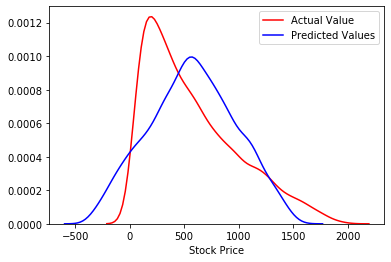

In [15]:
lm = LinearRegression()

lm.fit(x_train,y_train)

Yhat=lm.predict(x_train)

print('The R-square is: ', lm.score(x_train, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  0.8840197612322355
The mean square error of price and predicted value is:  21126.379777111782


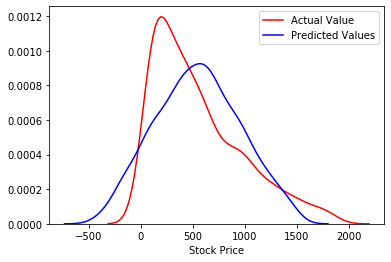

In [16]:
Yhat=lm.predict(x_test)


print('The R-square is: ', lm.score(x_test, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

In [17]:
print(21126.379777111782 - 20002.951063663484)

1123.4287134482984


#### R2 Scores for Training set and validation Set are 0.8877725748416626 and 0.8840197612322355. And Difference Between CrossVal loss and Train Loss is 1123.4287134482984

### Training The Linear Regression Model on Correlated Features

The R-square is:  0.8871193839292637
The mean square error of price and predicted value is:  20119.373104332335


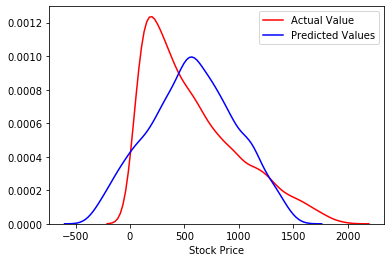

In [18]:
lm = LinearRegression()

x_train_new = x_train[['NAV', 'P/E Ratio']]

lm.fit(x_train_new,y_train)

Yhat=lm.predict(x_train_new)

print('The R-square is: ', lm.score(x_train_new, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

           NAV  P/E Ratio
3724  0.674335   0.113367
5629  0.422985   0.603341
125   0.371674   0.971446
2554  0.241048   0.845577
425   0.899580   0.631295
The R-square is:  0.883944791959816
The mean square error of price and predicted value is:  21140.035804531406


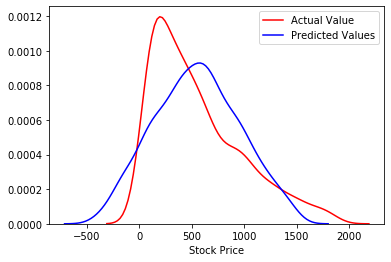

In [19]:
x_test_new = x_test[['NAV', 'P/E Ratio']]
print(x_test_new.head())
Yhat=lm.predict(x_test_new)


print('The R-square is: ', lm.score(x_test_new, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

#### It Shows that model is training only on 2 features...... So let us try some another non-linear approach

### Random Forest Regressor with all the parameters

The R-square is:  0.9999165397753693
The mean square error of price and predicted value is:  14.87560448521271


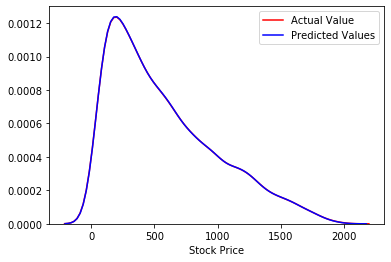

In [20]:
lm = RandomForestRegressor(n_estimators = 100, random_state = 0)

lm.fit(x_train,y_train)

Yhat=lm.predict(x_train)

print('The R-square is: ', lm.score(x_train, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  0.9995088170981483
The mean square error of price and predicted value is:  89.47141887959326


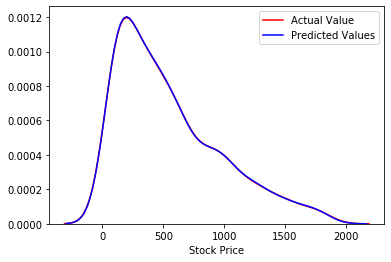

In [21]:
Yhat=lm.predict(x_test)


print('The R-square is: ', lm.score(x_test, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

### Training Random Forest Regressor model on data without highly correlated features

The R-square is:  0.8509674129902638
The mean square error of price and predicted value is:  26562.950550108526


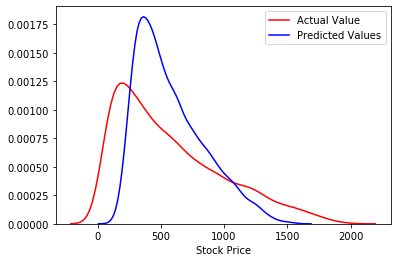

In [22]:
lm = RandomForestRegressor(n_estimators = 100, random_state = 0)

x_train_new = x_train.drop(['NAV', 'P/E Ratio'],axis = 1)

lm.fit(x_train_new,y_train)

Yhat=lm.predict(x_train_new)

print('The R-square is: ', lm.score(x_train_new, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  -0.05114883956639793
The mean square error of price and predicted value is:  191472.01129165318


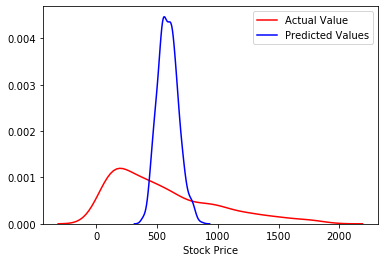

In [23]:
x_test_new = x_test.drop(['NAV','P/E Ratio'],axis = 1)

Yhat=lm.predict(x_test_new)


print('The R-square is: ', lm.score(x_test_new, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

#### R-square is negative So it is worst model

In [25]:
def CalcRMSE(output2,target2):
    error = output2-target2
    error_sq = error**2
    Sum_error_sq = np.sum(error_sq)
    variance = Sum_error_sq/len(output2)
    RMSE = variance**0.5
    return RMSE

## Random Forest algorithm with highly Correlated Features

The R-square is:  0.9999411676747245
The mean square error of price and predicted value is:  10.486029789832404
RMSE:  3.2382139814768887


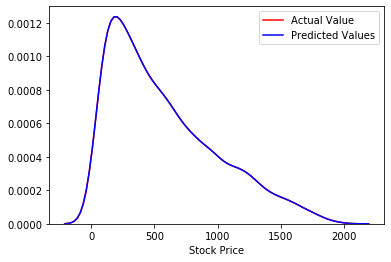

In [26]:
lm = RandomForestRegressor(n_estimators = 100, random_state = 0)

x_train_new = x_train[['NAV', 'P/E Ratio']]

lm.fit(x_train_new,y_train)

Yhat=lm.predict(x_train_new)

print('The R-square is: ', lm.score(x_train_new, y_train))
mse = mean_squared_error(y_train, Yhat)
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_train, Yhat))

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

The R-square is:  0.9996175583057706
The mean square error of price and predicted value is:  69.66366478235747
RMSE:  8.346476189527978


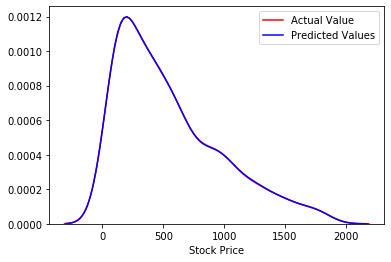

In [27]:
x_test_new = x_test[['NAV','P/E Ratio']]

Yhat=lm.predict(x_test_new)


print('The R-square is: ', lm.score(x_test_new, y_test))
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)
print("RMSE: ",CalcRMSE(y_test, Yhat))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)

### Neural Network

In [57]:
x_train_new = x_train.drop(['NAV', 'P/E Ratio'],axis = 1)
x_test_new = x_test.drop(['NAV','P/E Ratio'],axis = 1)

In [58]:
x_test_new.shape

(989, 19)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [66]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.3))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [67]:
# Building the model
n_cols = x_train_new.shape[1]
model = regression_model()

In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 30)                600       
_________________________________________________________________
dropout_11 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 21        
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________


In [69]:
hist = model.fit(x = x_train_new, y = y_train, epochs=30, validation_data = (x_test_new, y_test), shuffle = True, steps_per_epoch = 175, validation_steps = 30)

Train on 5603 samples, validate on 989 samples
Epoch 1/30
175/175 [==============================] - 6s 32ms/step - loss: 496132.3802 - val_loss: 14312.6406
Epoch 2/30
175/175 [==============================] - 3s 15ms/step - loss: 319643.9472 - val_loss: 6613.6094
Epoch 3/30
175/175 [==============================] - 2s 14ms/step - loss: 203558.5876 - val_loss: 6165.8068
Epoch 4/30
175/175 [==============================] - 2s 14ms/step - loss: 200837.4204 - val_loss: 6145.4729
Epoch 5/30
175/175 [==============================] - 3s 15ms/step - loss: 200365.3875 - val_loss: 6137.5323
Epoch 6/30
175/175 [==============================] - 3s 15ms/step - loss: 199783.4026 - val_loss: 6135.9693
Epoch 7/30
175/175 [==============================] - 2s 14ms/step - loss: 199452.7549 - val_loss: 6135.2359
Epoch 8/30
175/175 [==============================] - 2s 13ms/step - loss: 199035.6906 - val_loss: 6135.1927
Epoch 9/30
175/175 [==============================] - 2s 13ms/step - loss: 19910

### So it cannot train further .... And Also Validation loss is 6098.... Which is too large

### So We have tried all the possible comnbinations and strategies to fit the data in regression model.

### We have came accross the coclusion that Random Forest ALgorithm is the best method to fit our data